# Estimating the number of unseen species

Based on arXiv:1511.07428.
The Good-Toulmin estimator estimates the number of unseen species after a finite sampling of a population. The GT estimator is
$$
U^{GT}\equiv U^{GT}(X^n,t)\equiv - \sum_{t=1}^{\infty}(-t)^i\Phi_i
$$
They showed, for $t\leq 1$, that $U^{GT}$ is nearly unbiased and that the approximation is within an $\sqrt{n}t$ error-bound. 
Efron and Thisted showed that a finite value for the estimator can be obtained for $t \gt 1$ using 
$$
U^{ET}\equiv \sum_{i=1}^{n}h_i^{ET}\Phi_i,
$$
where
$$
h_i^{ET}\equiv -(-t)^i \mathbb{P} (Bin(k,\frac{1}{1+t})\geq i),
$$
and whenever $i \leq k$
$$
\mathbb{P}\left( Bin\left(k,\frac{1}{1+t}\right) \geq i \right)=
\sum_{j=i}^{k}{{k}\choose{j}} \frac{t^{k-j}}{(1+t)^k}
$$
or 0 otherwise ($i \gt k$).

So far there was no provable guarantee for its performance and no indication on how to best choose k. arXiv:1511.07428 fills these gaps.

A smoothed GT estimator is derived which predict U optimally for any $t \propto \log n$, and it applies to different models. The new estimator is given by 
$$
U^L=\mathbb{E}_L\left[ -\sum_{i=1}^{L} (-t)^i \Phi_i \right]=
-\sum_{i \geq 1} (-t)^i \mathbb{P} (L \geq i) \Phi_i,
$$
where $L$ is sampled at random. $U^{ET}$ corresponds to the binomial probability for the smoothing distribution $\mathbb P$.

The statistical models that are considered in the paper are: 
* Multinomial: i.i.d samples
* Hypergeometric: sampling without replacement variant of multinomial
* Poisoon: as in multinomial but with sample size Poisson distributed
* Bernoulli-product: ?

Of interest to us is the hypergeometric model.
See also *support size estimation*, *missing mass estimation* and *Goog-Turing* problems.

## Generating the histogram of histogram (or prevalence list)

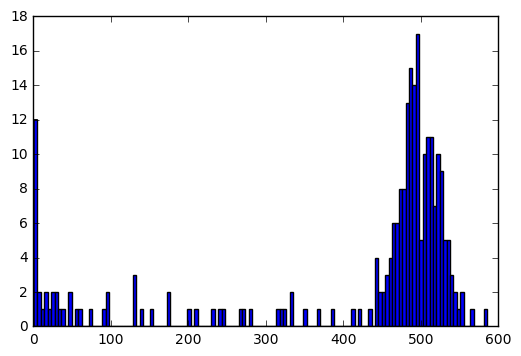

n:  10000000


In [36]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

numb_uniqueSymbols = 100000 #number of unique symbols
maxVal = 1000000 #maximum allowed number of unique symbols

'''
sample uniformely at random the number of occurences of each unique symbol.
The array histo represent the real population distribution
'''
histo = np.random.random_integers(maxVal, size=(numb_uniqueSymbols,))

'''
R: the number of symbols
r_x: number of occurrences of symbol x
n: number of samples
counts: represents the sampled population distribution, assuming an hypergeometric model
'''
R = sum(histo)
n = 10000000
counts = []
for r_x in histo:
    counts.append(np.random.hypergeometric(r_x, R-r_x, n))

from collections import Counter
species = Counter(counts).keys()# equals to list(set(counts))
occurrences = Counter(counts).values()# counts the elements' frequency

'''
Phi: array, whose i-th location counts how many species have been seen i times
'''
[Phi, edges, patches] = plt.hist(occurrences, bins=len(set(occurrences)))
# print Phi
plt.show() # this is the histogram of histogram for my simulated experiment
print 'n: ', n

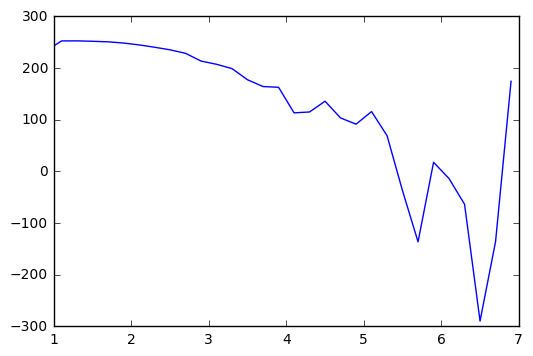

In [37]:
from module import *
module = reload(module)

'''
R: the number of symbols
r_x: number of occurrences of symbol x
n: number of samples
counts: represents the sampled population distribution, assuming an hypergeometric model
Phi: array, whose i-th location counts how many species have been seen i times
t: fold-change from the initial sampling of size n (at most log n)
sd_samples: numer of times to sample the smoothing distro
'''

y = []
x = []

x.append(1)
y.append(sum(Phi))

for t in np.arange(1.1,7.1,.2):
    x.append(t)
    value = smoothedGT(Phi,n,t,sd_samples=100000) # evaluate the expected new number of molecule types
    y.append(value)

plt.figure(1)
plt.plot(x,y)
plt.show()

In [38]:
print np.sqrt(n)*t

21819.7158552
